In [105]:
import pandas as pd
import fastparquet
import os
import random
from sklearn.preprocessing import OneHotEncoder

first=random.randint(0,len(os.listdir('/stuff/data collection and cleanup/dns data by date')))
second=random.randint(0,len(os.listdir('/stuff/data collection and cleanup/dns data by date')))
if first == second:
    while first == second:
        second = random.randint(0,len(os.listdir('/stuff/data collection and cleanup/dns data by date')))
        
firstdate=pd.read_parquet('/stuff/data collection and cleanup/dns data by date/'+os.listdir('/stuff/data collection and cleanup/dns data by date')[first])
seconddate=pd.read_parquet('/stuff/data collection and cleanup/dns data by date/'+os.listdir('/stuff/data collection and cleanup/dns data by date')[second])

def toint(cell):
    cell = int(cell)
    return cell
firstdate=firstdate.applymap(toint)
seconddate=seconddate.applymap(toint)

if len(firstdate)>len(seconddate):
    xtrain=firstdate.loc[:,'ttl':'4th Octet']
    ytrain=firstdate['benign']
    xtest=seconddate.loc[:,'ttl':'4th Octet']
    ytest=seconddate['benign']
    
else:
    xtrain=seconddate.loc[:,'ttl':'4th Octet']
    ytrain=seconddate['benign']
    xtest=firstdate.loc[:,'ttl':'4th Octet']
    ytest=firstdate['benign']
features=list(range(0,256))
onehotcolumns=[features,features,features,features]

encoder=OneHotEncoder(categories=onehotcolumns)
hotdatatrain=encoder.fit_transform(xtrain)
hotdatatest=encoder.fit_transform(xtest)

TypeError: __init__() got an unexpected keyword argument 'categories'

In [107]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


In [79]:
hotdatatest.shape

(2520, 1364)

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf=MLPClassifier(alpha=1e-5,max_iter= 2000, warm_start = False, shuffle=True)

model=clf.fit(hotdatatrain,ytrain)

ypred=model.predict(hotdatatest)
print(classification_report(ytest,ypred))


ValueError: dimension mismatch

In [158]:
g2ip=pd.DataFrame({'ttl':[3600],'1st Octet':[172], '2nd Octet':[104],'3rd Octet':[18],'4th Octet':[217]})
g2ip=g2ip[['ttl','1st Octet','2nd Octet','3rd Octet','4th Octet']]

wmip=pd.DataFrame({'ttl':[40048], '1st Octet':[128],'2nd Octet':[239],'3rd Octet':[29],'4th Octet':[10]})
encoder.transform(g2ip.loc[:,'ttl':'4th Octet'])

In [10]:
firsttwogood=goodguys.loc[:,'1st Octet':'2nd Octet'].reset_index(drop=True)
firsttwobad=badguys.loc[:,'1st Octet': '2nd Octet'].reset_index(drop=True)
plotdatagood=firsttwogood.groupby(firsttwogood.columns.tolist()).size().reset_index()
plotdatabad=firsttwobad.groupby(firsttwobad.columns.tolist()).size().reset_index()

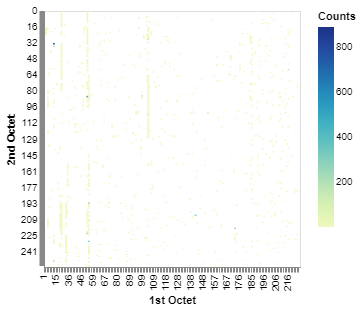

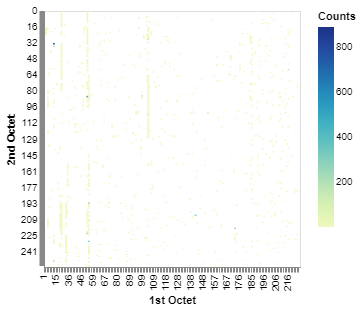

In [42]:
import altair as alt
alt.renderers.enable('notebook')
plotdatagood=plotdatagood.rename(columns={0:'Counts'})
plotdatabad=plotdatabad.rename(columns={0:'Counts'})
    
alt.Chart(plotdatagood).mark_rect().encode(x='1st Octet:O', y='2nd Octet:O', color='Counts').properties(width=256, height=256)


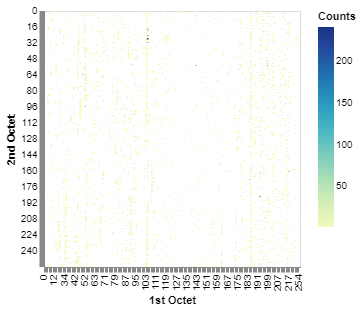

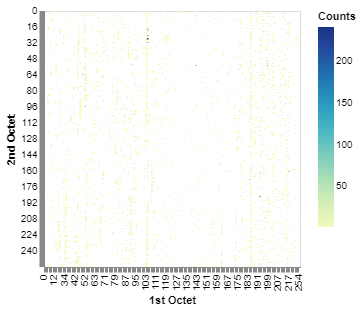

In [41]:
alt.Chart(plotdatabad).mark_rect().encode(x='1st Octet:O', y='2nd Octet:O', color='Counts').properties(width=256, height=256)